## Import Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from keras.utils import to_categorical
from sklearn.metrics import r2_score
from numpy import loadtxt
import tensorflow as tf
import seaborn as sn
import matplotlib
from matplotlib import rc
from numpy import loadtxt
import pickle
from scipy.constants import g
import math 
from scipy import stats
from sklearn.preprocessing import StandardScaler
import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

Using TensorFlow backend.
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

## Import model and data arrays

In [3]:
model = tensorflow.keras.models.load_model('final_model.h5')
X_test_combined = loadtxt('testingX_unprocessed.csv', delimiter=',')
X_train_combined_pro = loadtxt('trainX_processed.csv', delimiter=',')
X_test_combined_pro = loadtxt('testingX_processed.csv', delimiter=',')
y_test_combined = loadtxt('testingy_processed.csv', delimiter=',')

## Re-format targets 

In [4]:
test_targets = to_categorical(y_test_combined)
Y_pred = np.argmax(y_test_combined,axis=1)

## Make prediction and re-format 

In [5]:
conpred_adj = model.predict_classes(X_test_combined_pro)
Y_pred_adj = np.argmax(y_test_combined,axis=1)

## Set up Conf-matrix 

In [6]:
#print(conpred_adj, Y_pred_adj)
for i in range(43):
    if conpred_adj[i] == 0:
        conpred_adj[i] = 3
    elif conpred_adj[i] == 3:
        conpred_adj[i] = 0 
    if Y_pred_adj[i] == 0:
        Y_pred_adj[i] = 3
    elif Y_pred_adj[i] == 3:
        Y_pred_adj[i] = 0 

array = confusion_matrix(Y_pred_adj, conpred_adj)
df_cm = pd.DataFrame(array, ["Stokes","Cnoidal", "Solitary", "Bore"], ["Stokes","Cnoidal", "Solitary", "Bore"])

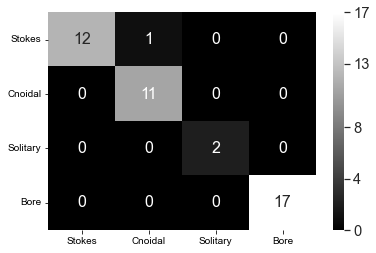

In [7]:
#plt.rcParams['text.usetex'] = True # "font.family": "Helvetica"
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)
fig, ax = plt.subplots()
sn.set(font_scale=1.34) # for label size, font='Computer Modern'
plt.xlabel(r"Predicted wave type")
plt.ylabel(r"True wave type")

sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="gray",clim=(0, 17), cbar_kws={'ticks':[0,4,8,13,17]}) # font size
plt.yticks(rotation=0)
#plt.savefig("confmat_fs1_34.jpg", dpi=1200, bbox_inches="tight")
plt.show()

In [11]:
print("Model accuracy:", round(accuracy_score(Y_pred_adj,conpred_adj), 2) * 100, "%")

Model accuracy: 98.0 %


## Set up decision boundaries figure

In [7]:
def make_T(data): 
    S = data[1]
    M = data[2]
    alpha = data[3]
    aaaaaaaa = math.radians(alpha)
    T = (S**(1/3)) * M * math.cos((6/7) * aaaaaaaa)
    return T 

In [8]:
def make_points(data): # take in the whole test/train set 
    x = np.zeros(len(data))
    y = np.zeros(len(data))
    
    for i in range(0,len(data)):
        x[i] = data[i][0]
        
    for i in range(0,len(data)):
        y[i] = make_T(data[i])
    return x,y

In [9]:
def plot_make_graph(data,targets):
    
    a = []
    b = []
    c = []
    d = []
    
    
    
    
    for i in range(len(data)-1):
        if targets[i] == 0: 
            a = np.hstack((a,i))
        elif targets[i] == 1: 
            b = np.hstack((b,i))
        elif targets[i] == 2: 
            c = np.hstack((c,i))
        elif targets[i] == 3: 
            d = np.hstack((d,i))
    
    A = np.zeros((len(a),5))
    B = np.zeros((len(b),5))
    C = np.zeros((len(c),5))
    D = np.zeros((len(d),5))
    
  
    
    h1 = 0 
    h2 = 0
    h3 = 0
    h4 = 0
    
    for i in range(len(data)-1):
        if targets[i] == 0:
            A[h1] = data[i]
            h1 += 1
        elif targets[i] == 1:
            B[h2] = data[i]
            h2 += 1
        elif targets[i] == 2:     
            C[h3] = data[i]
            h3 += 1
        elif targets[i] == 3:
            D[h4] = data[i]
            h4 += 1
            
    Borex, Borey = make_points(A)
    Cnoidalx, Cnoidaly = make_points(B)
    Solitaryx, Solitaryy = make_points(C)
    Stokesx, Stokesy = make_points(D)
    
    make_graph(Borex,Borey,Cnoidalx, Cnoidaly,Solitaryx, Solitaryy,Stokesx, Stokesy)
    
            

In [10]:
def make_graph(bx,by,cx,cy,sx,sy,stx,sty):
    #set up
    plt.xlabel('F', fontsize=15)
    plt.ylabel('T', fontsize=15)
    
    plt.xscale('log')
    plt.yscale('log')
    
    axes = plt.gca()
    axes.set_xlim([0.8,8])
    axes.set_ylim([0.02,10])
    
    plt.plot()

    fx = np.linspace(0.8,8, 1000)
    tylow = (4/5) * (fx ** (-7/5) )  
    tyhi = (11) * (fx ** (-5/2) ) 
    
    plt.plot(fx , tylow)
    plt.plot(fx , tyhi, ":")
    
    
    
    
    plt.plot(bx,by,"^",color = "r", label = "Bore-like")
    plt.plot(cx,cy,"s",color = "c", label = "Cnoidal-like")
    plt.plot(sx,sy,"d",color = "b", label = "Solitary-like")
    plt.plot(stx,sty,"o",color = "y", label = "Stokes-like")

    plt.legend()
    

In [11]:
def make_graph_safety(bx,by,cx,cy,sx,sy,stx,sty):
    #set up
    plt.xlabel('F', fontsize=15)
    plt.ylabel('T', fontsize=15)
    
    plt.xscale('log')
    plt.yscale('log')
    
    axes = plt.gca()
    axes.set_xlim([0.8,8])
    axes.set_ylim([0.02,10])
    
    plt.plot()

    fx = np.linspace(0.8,8, 1000)
    tylow = (4/5) * (fx ** (-7/5) )  
    tyhi = (11) * (fx ** (-5/2) ) 
    
    plt.plot(fx , tylow)
    plt.plot(fx , tyhi, ":")
    plt.plot(xg,yg,"x")

    plt.legend()
    

In [12]:
def plot_make_graph_ml(data,targets,data_norm): 

    predictions = model.predict_classes(data_norm)
    print(predictions)
    print(targets)
    # Find correct predictions 
    a = []
    b = []
    
    for i in range(len(data)-1):
        if predictions[i] == targets[i]:
            a = np.hstack((a,i))
        else: 
            b = np.hstack((b,i))
            
    correct_data = np.zeros((len(a),4))
    incorrect_data = np.zeros((len(b),4))
    
    correct_targets = np.zeros((len(a),1))
    incorrect_targets = np.zeros((len(b),1))
    
    
    
    h1 = 0 
    h2 = 0        
    
    for i in range(0,len(data)-1):
        if predictions[i] == targets[i]:
            correct_data[h1] = data[i]
            correct_targets[h1] = targets[i]
            h1 += 1
        elif predictions[i] != targets[i]: 
            incorrect_data[h2] = data[i]
            incorrect_targets[h2] = targets[i]
            h2+= 1 
    
                
    #print(correct_data,incorrect_data, correct_targets,incorrect_targets)
    #print(incorrect_data)
     
   
    
    
    # Make points for correct         
    a = []
    b = []
    c = []
    d = []
    
    for i in range(len(correct_data)-1):
        if correct_targets[i] == 0: 
            a = np.hstack((a,i))
        elif correct_targets[i] == 1: 
            b = np.hstack((b,i))
        elif correct_targets[i] == 2: 
            c = np.hstack((c,i))
        elif correct_targets[i] == 3: 
            d = np.hstack((d,i))
    
    A = np.zeros((len(a),4))
    B = np.zeros((len(b),4))
    C = np.zeros((len(c),4))
    D = np.zeros((len(d),4))
    
  
    
    h1 = 0 
    h2 = 0
    h3 = 0
    h4 = 0
    
    for i in range(len(correct_data)-1):
        if correct_targets[i] == 0:
            A[h1] = correct_data[i]
            h1 += 1
        elif correct_targets[i] == 1:
            B[h2] = correct_data[i]
            h2 += 1
        elif correct_targets[i] == 2:     
            C[h3] = correct_data[i]
            h3 += 1
        elif correct_targets[i] == 3:
            D[h4] = correct_data[i]
            h4 += 1
                
    # Make points for incorrect 
    a = []
    b = []
    c = []
    d = []
   
    for i in range(0,len(incorrect_data)):
        if incorrect_targets[i] == 0: 
            a = np.hstack((a,i))
        elif incorrect_targets[i] == 1: 
            b = np.hstack((b,i))
        elif incorrect_targets[i] == 2: 
            c = np.hstack((c,i))
        elif incorrect_targets[i] == 3: 
            d = np.hstack((d,i))
    
    Ai = np.zeros((len(a),4))
    Bi = np.zeros((len(b),4))
    Ci = np.zeros((len(c),4))
    Di = np.zeros((len(d),4))
    
  
    
    h1 = 0 
    h2 = 0
    h3 = 0
    h4 = 0
    
    for i in range(0,len(incorrect_data)):
        if incorrect_targets[i] == 0:
            Ai[h1] = incorrect_data[i]
            h1 += 1
        elif incorrect_targets[i] == 1:
            Bi[h2] = incorrect_data[i]
            h2 += 1
        elif incorrect_targets[i] == 2:     
            Ci[h3] = incorrect_data[i]
            h3 += 1
        elif incorrect_targets[i] == 3:
            Di[h4] = incorrect_data[i]
            h4 += 1
                           
    
    
    
    
    
    
    
    print(A)
    
    
    Borexc, Boreyc = make_points(A)
    Cnoidalxc, Cnoidalyc = make_points(B)
    Solitaryxc, Solitaryyc = make_points(C)
    Stokesxc, Stokesyc = make_points(D)
    
    Borexi, Boreyi = make_points(Ai)
    Cnoidalxi, Cnoidalyi = make_points(Bi)
    Solitaryxi, Solitaryyi= make_points(Ci)
    Stokesxi, Stokesyi = make_points(Di)
    
    print(Borexc)
    
    
    make_graph_with_ML(Borexc,Boreyc,Cnoidalxc, Cnoidalyc,Solitaryxc, Solitaryyc,Stokesxc, Stokesyc, Borexi,Boreyi,Cnoidalxi, Cnoidalyi,Solitaryxi, Solitaryyi,Stokesxi, Stokesyi)
    
    
    
    

In [13]:
def plot_make_graph_ml_adj(data,targets,data_norm): 

    predictions = model.predict_classes(data_norm)
    targets = np.argmax(y_test_combined,axis=1)
    print(predictions)
    print(targets)
    # Find correct predictions 
    a = []
    b = []
    
    for i in range(len(data)-1):
        if predictions[i] == targets[i]:
            a = np.hstack((a,i))
        else: 
            b = np.hstack((b,i))
            
    correct_data = np.zeros((len(a),4))
    incorrect_data = np.zeros((len(b),4))
    
    correct_targets = np.zeros((len(a),1))
    incorrect_targets = np.zeros((len(b),1))
    
    
    
    h1 = 0 
    h2 = 0        
    
    for i in range(0,len(data)-1):
        if predictions[i] == targets[i]:
            correct_data[h1] = data[i]
            correct_targets[h1] = targets[i]
            h1 += 1
        elif predictions[i] != targets[i]: 
            incorrect_data[h2] = data[i]
            incorrect_targets[h2] = targets[i]
            h2+= 1 
    
                
    #print(correct_data,incorrect_data, correct_targets,incorrect_targets)
    #print(incorrect_data)
     
   
    
    
    # Make points for correct         
    a = []
    b = []
    c = []
    d = []
    
    for i in range(len(correct_data)-1):
        if correct_targets[i] == 0: 
            a = np.hstack((a,i))
        elif correct_targets[i] == 1: 
            b = np.hstack((b,i))
        elif correct_targets[i] == 2: 
            c = np.hstack((c,i))
        elif correct_targets[i] == 3: 
            d = np.hstack((d,i))
    
    A = np.zeros((len(a),4))
    B = np.zeros((len(b),4))
    C = np.zeros((len(c),4))
    D = np.zeros((len(d),4))
    
  
    
    h1 = 0 
    h2 = 0
    h3 = 0
    h4 = 0
    
    for i in range(len(correct_data)-1):
        if correct_targets[i] == 0:
            A[h1] = correct_data[i]
            h1 += 1
        elif correct_targets[i] == 1:
            B[h2] = correct_data[i]
            h2 += 1
        elif correct_targets[i] == 2:     
            C[h3] = correct_data[i]
            h3 += 1
        elif correct_targets[i] == 3:
            D[h4] = correct_data[i]
            h4 += 1
                
    # Make points for incorrect 
    a = []
    b = []
    c = []
    d = []
   
    for i in range(0,len(incorrect_data)):
        if incorrect_targets[i] == 0: 
            a = np.hstack((a,i))
        elif incorrect_targets[i] == 1: 
            b = np.hstack((b,i))
        elif incorrect_targets[i] == 2: 
            c = np.hstack((c,i))
        elif incorrect_targets[i] == 3: 
            d = np.hstack((d,i))
    
    Ai = np.zeros((len(a),4))
    Bi = np.zeros((len(b),4))
    Ci = np.zeros((len(c),4))
    Di = np.zeros((len(d),4))
    
  
    
    h1 = 0 
    h2 = 0
    h3 = 0
    h4 = 0
    
    for i in range(0,len(incorrect_data)):
        if incorrect_targets[i] == 0:
            Ai[h1] = incorrect_data[i]
            h1 += 1
        elif incorrect_targets[i] == 1:
            Bi[h2] = incorrect_data[i]
            h2 += 1
        elif incorrect_targets[i] == 2:     
            Ci[h3] = incorrect_data[i]
            h3 += 1
        elif incorrect_targets[i] == 3:
            Di[h4] = incorrect_data[i]
            h4 += 1
                           
    
    
    
    
    
    
    
    print(A)
    
    
    Stokesxc, Stokesyc = make_points(A)
    Cnoidalxc, Cnoidalyc = make_points(B)
    Solitaryxc, Solitaryyc = make_points(C)
    Borexc, Boreyc= make_points(D) 
    
    Stokesxi, Stokesyi = make_points(Ai) 
    Cnoidalxi, Cnoidalyi = make_points(Bi)
    Solitaryxi, Solitaryyi= make_points(Ci)
    Borexi, Boreyi  = make_points(Di)
    
    print(Borexc)
    
    
    make_graph_with_ML_adj(Borexc,Boreyc,Cnoidalxc, Cnoidalyc,Solitaryxc, Solitaryyc,Stokesxc, Stokesyc, Borexi,Boreyi,Cnoidalxi, Cnoidalyi,Solitaryxi, Solitaryyi,Stokesxi, Stokesyi)
    
    
    
    

In [14]:
def make_graph_with_ML_adj(bxc,byc,cxc,cyc,sxc,syc,stxc,styc,bxi,byi,cxi,cyi,sxi,syi,stxi,styi):
    
    fx = np.linspace(0.8,8, 1000)
    tylow = (4/5) * (fx ** (-7/5) )  
    tyhi = (11) * (fx ** (-5/2) ) 
    
    fig, ax = plt.subplots()
    plt.xlabel('F', fontsize=13)
    plt.ylabel('T', fontsize=13)
    
    plt.xscale('log')
    plt.yscale('log')

    plt.fill_between(fx,0.02,tylow,color="grey")
    plt.fill_between(fx,tylow,tyhi,color="lightgrey")
    
    plt.fill_between(fx,tyhi,10,color="white")
    
    
    #axes = plt.gca()
    #axes.patch.set_edgecolor('black')  
    #axes.patch.set_linewidth('1')
    
    ax.set_xticks([0.8,1,2,3,4,6,8])
    ax.set_xticklabels([0.8,1,2,3,4,6,8])
    ax.set_yticks([0.02,0.1,1,10])
    ax.set_yticklabels([0.02,0.1,1,10])
    ax.set_xlim([0.8,8])
    ax.set_ylim([0.02,10])
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1
    plt.plot()
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(13) 
    
    #plt.set_xticks([0.8, 1,4,8])

    fx = np.linspace(0.8,8, 1000)
    tylow = (4/5) * (fx ** (-7/5) )  
    tyhi = (11) * (fx ** (-5/2) ) 
    
    plt.plot(fx , tylow,color="k")
    plt.plot(fx , tyhi, ":",color="k")
    
    #Correct prediction 
    ax.plot(bxc,byc,"^",color = "darkgray", label = "Stokes-like") #correct prediction
    ax.plot(cxc,cyc,"s",color = "darkgray", label = "Cnoidal-like")
    ax.plot(sxc,syc,"d",color = "darkgray", label = "Solitary-like")
    ax.plot(stxc,styc,"o",color = "darkgray", label = "Bore-like")
    #Incorrect prediction 
    ax.plot(bxi,byi,"^",color = "k") # , label = "Bore-like incorrect prediction"
    ax.plot(cxi,cyi,"s",color = "k") # , label = "Cnoidal-like incorrect prediction"
    ax.plot(sxi,syi,"d",color = "k") #label = "Solitary-like incorrect prediction"
    ax.plot(stxi,styi,"o",color = "k") # label = "Stokes-like incorrect prediction"
    ax.legend(loc="upper left", fontsize=13)
    plt.savefig("decisionboundaries.jpg", dpi=1200, bbox_inches="tight")
    
    plt.show()
    
    

[3 0 0 0 3 0 1 0 2 0 3 1 3 0 0 3 1 3 0 3 1 1 2 0 1 3 1 0 0 0 0 1 3 3 3 0 1
 0 1 3 1 1 0]
[3 0 0 0 3 0 1 0 2 0 3 1 3 0 0 3 3 3 0 3 1 1 2 0 1 3 1 0 0 0 0 1 3 3 3 0 1
 0 1 3 1 1 0]
[[ 4.14523003  0.37633333  0.88561239 30.        ]
 [ 6.82691302  1.552       1.86301126 90.        ]
 [ 4.03095927  0.35433333  1.24734203 45.        ]
 [ 3.08822552  0.609       2.32760504 45.        ]
 [ 3.98198609  0.50966667  2.30825811 45.        ]
 [ 3.10571594  0.50233333  2.3879416  45.        ]
 [ 3.78728667  0.4835      2.77868606 45.        ]
 [ 3.4106323   0.592       1.20497047 60.        ]
 [ 3.4106323   0.592       1.20512649 60.        ]
 [ 5.12842983  1.50733333  1.79792711 90.        ]
 [ 4.03795544  0.341       1.16638805 45.        ]
 [ 4.60074573  0.62866667  5.00434637 60.        ]
 [ 3.4106323   0.592       1.20521565 60.        ]
 [ 4.21519172  0.61433333  2.47776663 60.        ]
 [ 3.36399118  0.48886667  2.4212415  30.        ]
 [ 3.82735872  0.91133333  5.0194138  45.        ]]
[2.26

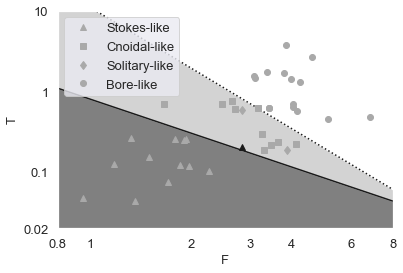

In [15]:
plot_make_graph_ml_adj(X_test_combined,y_test_combined,X_test_combined_pro)